In [1]:
from yolo.yolo_predict import YoloPredict
yp = YoloPredict()

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


第一個模型成功
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

第二個模型成功
第三個模型成功
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

第四個模型成功
[01/15/2023-16:10:25] [TRT] [I] Loaded engine size: 71 MiB
[01/15/2023-16:10:25] [TRT] [I] [MemUsageChange] Init cuBLAS/cuBLASLt: CPU +0, GPU +8, now: CPU 3246, GPU 10235 (MiB)
[01/15/2023-16:10:25] [TRT] [I] [MemUsageChange] Init cuDNN: CPU +0, GPU +10, now: CPU 3246, GPU 10245 (MiB)
[01/15/2023-16:10:25] [TRT] [W] TensorRT was linked against cuDNN 8.6.0 but loaded cuDNN 8.5.0
[01/15/2023-16:10:25] [TRT] [I] [MemUsageChange] TensorRT-managed allocation in engine deserialization: CPU +0, GPU +70, now: CPU 0, GPU 70 (MiB)
[01/15/2023-16:10:25] [TRT] [I] [MemUsageChange] Init cuBLAS/cuBLASLt: CPU +1, 

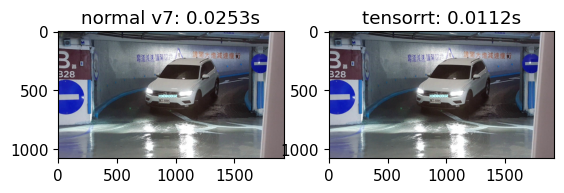

In [16]:
import cv2
import time
%matplotlib inline
import matplotlib.pyplot as plt

img = cv2.imread("./yolo/images/00011.jpg")
t1 = time.time()
img = yp.predict(img)
end = time.time()-t1

# ====================================tensorrt
img2 = cv2.imread("./yolo/images/00011.jpg")
t1 = time.time()
img2 = yp.predict_trt(img2)
end2 = time.time()-t1


plt.figure()
plt.subplot(1,2,1)
plt.title("normal v7: " + str(round(end,4))+"s")
plt.imshow(img)
          
plt.subplot(1,2,2)
plt.title("tensorrt: "+ str(round(end2,4))+"s")
plt.imshow(img2)
plt.show()